# Context:
    
The dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, 
each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to 
the set of attributes. The link to the dataset can be found below.

# Dataset:
https://www.kaggle.com/renaldydermawan25/credit-data/version/1

# Some Attribute information:
    
Age (numeric)

Sex (text: male, female)

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

Housing (text: own, rent, or free)

Saving accounts (text - little, moderate, quite rich, rich)

Checking account (numeric, in DM - Deutsch Mark)

Credit amount (numeric, in DM)

Duration (numeric, in month)

Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

# Objective:
    
To Guage Feature Importance

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns", 50)

In [3]:
#Read input file and understand the data
# "default" is my dependent variable
df = pd.read_csv("credit_data.csv")
df.head(5)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [4]:
df.tail(5)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
995,0,no checking account,12,existing credits paid back duly till now,radio/television,1736,... < 100 DM,4 <= ... < 7 years,3,female : divorced/separated/married,none,4,real estate,31,none,own,1,unskilled - resident,1,none,yes
996,0,< 0 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male : divorced/separated,none,4,if not A121 : building society savings agreeme...,40,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
997,0,no checking account,12,existing credits paid back duly till now,domestic appliances,804,... < 100 DM,.. >= 7 years,4,male : single,none,4,"if not A121/A122 : car or other, not in attrib...",38,none,own,1,skilled employee / official,1,none,yes
998,1,< 0 DM,45,existing credits paid back duly till now,domestic appliances,1845,... < 100 DM,1 <= ... < 4 years,4,male : single,none,4,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes
999,0,0 <= ... < 200 DM,45,critical account/ other credits existing (not ...,car (used),4576,100 <= ... < 500 DM,unemployed,3,male : single,none,4,"if not A121/A122 : car or other, not in attrib...",27,none,own,1,skilled employee / official,1,none,yes


In [5]:
df.shape

(1000, 21)

In [6]:
df.isnull().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

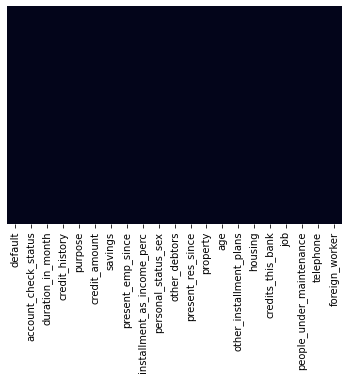

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [9]:
df.nunique()

default                         2
account_check_status            4
duration_in_month              33
credit_history                  5
purpose                        10
credit_amount                 921
savings                         5
present_emp_since               5
installment_as_income_perc      4
personal_status_sex             4
other_debtors                   3
present_res_since               4
property                        4
age                            53
other_installment_plans         3
housing                         3
credits_this_bank               4
job                             4
people_under_maintenance        2
telephone                       2
foreign_worker                  2
dtype: int64

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
default,1000,NaN,NaN,NaN,0.3,0.458487,0,0,0,1,1
account_check_status,1000,4,no checking account,394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_in_month,1000,NaN,NaN,NaN,20.903,12.0588,4,12,18,24,72
credit_history,1000,5,existing credits paid back duly till now,530,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purpose,1000,10,domestic appliances,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
credit_amount,1000,NaN,NaN,NaN,3271.26,2822.74,250,1365.5,2319.5,3972.25,18424
savings,1000,5,... < 100 DM,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
present_emp_since,1000,5,1 <= ... < 4 years,339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment_as_income_perc,1000,NaN,NaN,NaN,2.973,1.11871,1,2,3,4,4
personal_status_sex,1000,4,male : single,548,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.skew().sort_values(ascending=False)

credit_amount                 1.949628
people_under_maintenance      1.909445
credits_this_bank             1.272576
duration_in_month             1.094184
age                           1.020739
default                       0.874183
present_res_since            -0.272570
installment_as_income_perc   -0.531348
dtype: float64

In [12]:
df.kurt().sort_values(ascending=False)

credit_amount                 4.292590
people_under_maintenance      1.649274
credits_this_bank             1.604439
duration_in_month             0.919781
age                           0.595780
installment_as_income_perc   -1.210473
default                      -1.238284
present_res_since            -1.381449
dtype: float64

In [ ]:
## Assign to Categorical vs Numerical
#Categorical
'default','account_check_status','personal_status_sex','other_debtors','property','other_installment_plans',
'housing','job','credit_history','purpose','savings','present_emp_since','telephone','foreign_worker' 
'people_under_maintenance','present_res_since','installment_as_income_perc','credits_this_bank'
#Continous
'age','credit_amount','duration_in_month'


### Univariate analysis


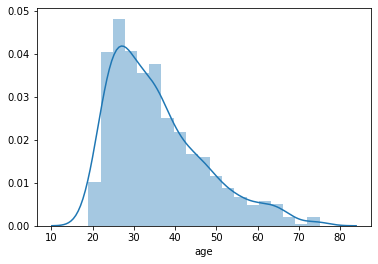

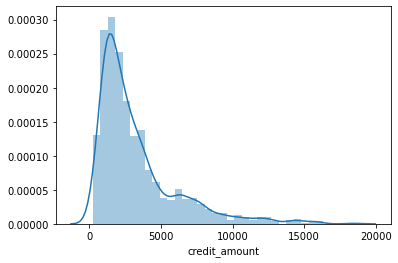

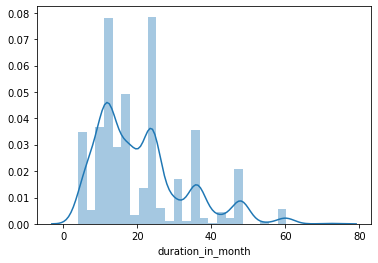

In [13]:
# Distribution Plots for Continous Variables
for i,col in enumerate(['age','credit_amount','duration_in_month']):
    sns.distplot(df[col])
    plt.show()
# Binning for Age or Duration of month

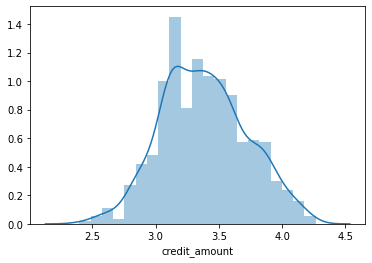

In [14]:
sns.distplot(np.log10(df['credit_amount']))
# Log transformation works for credit amount to be used in Linear Models.

In [15]:
df['credit_amount_log'] = np.log10(df['credit_amount'])

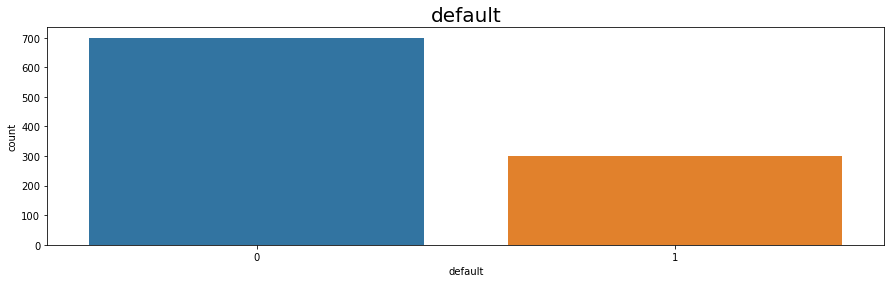

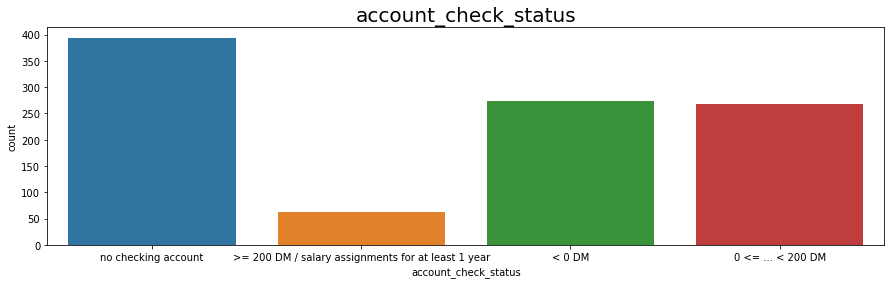

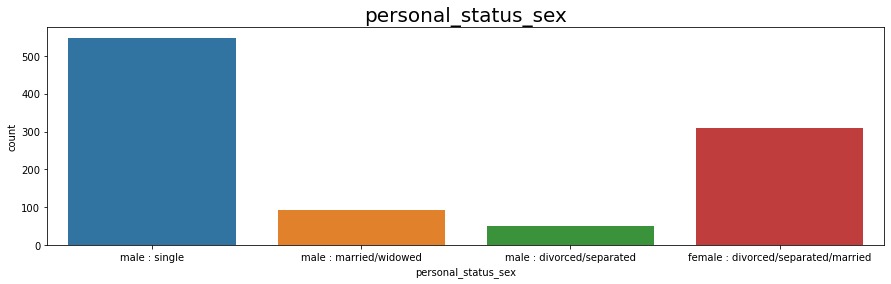

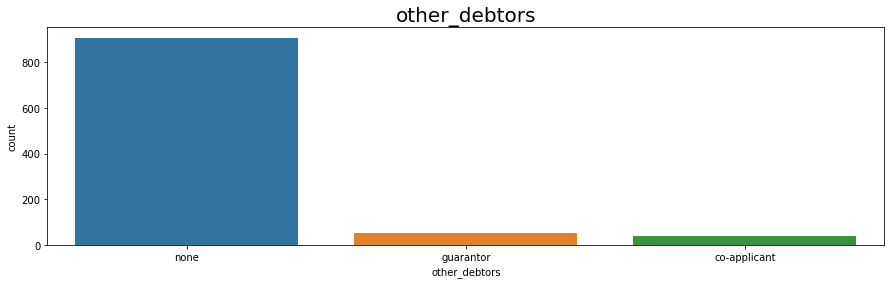

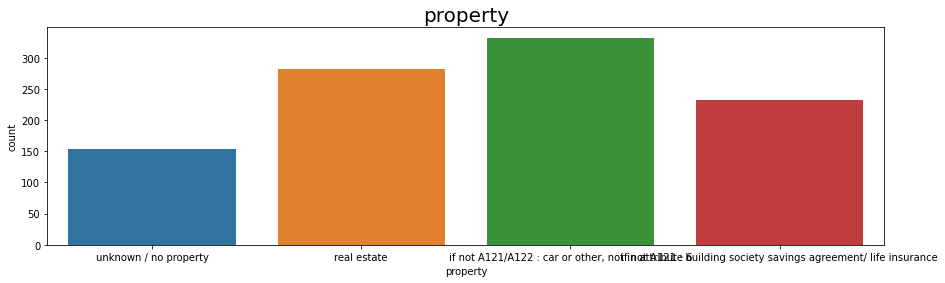

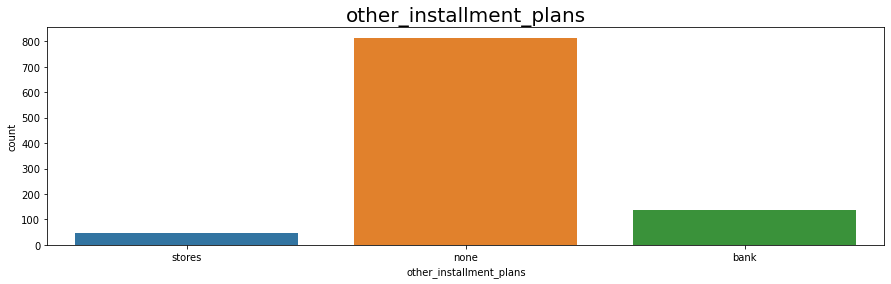

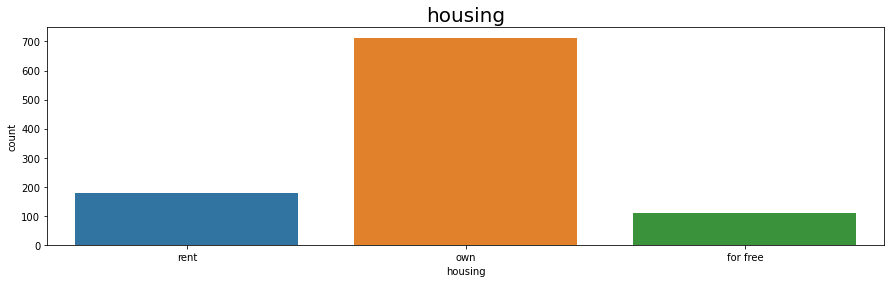

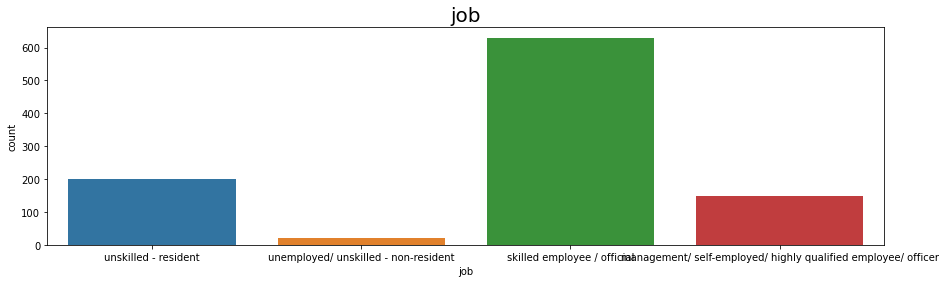

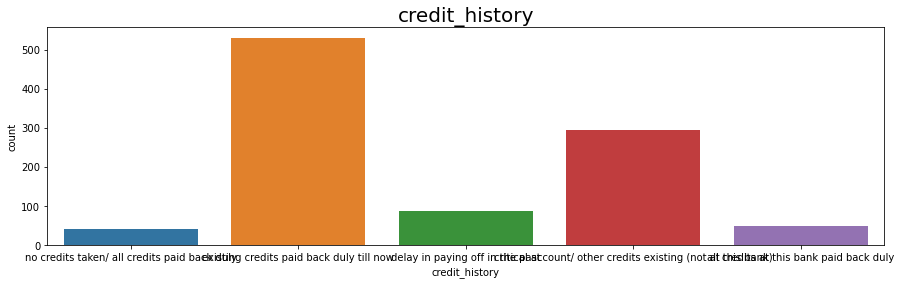

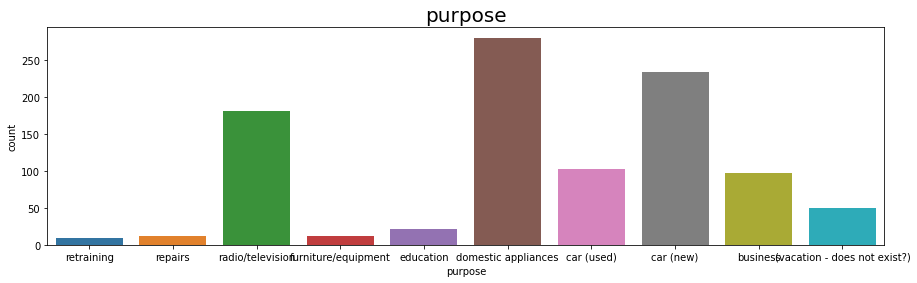

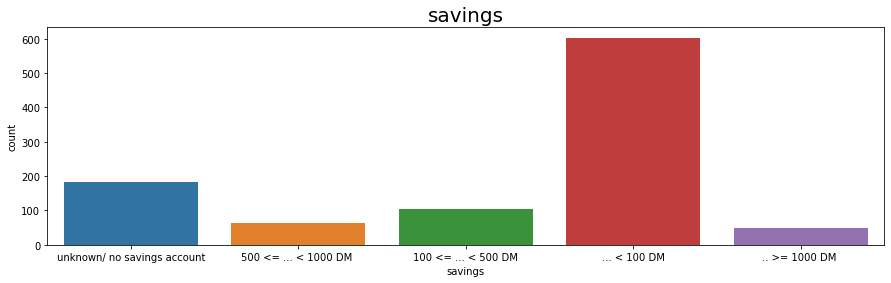

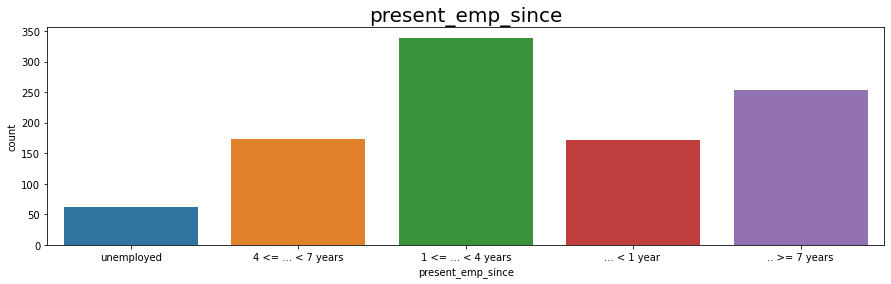

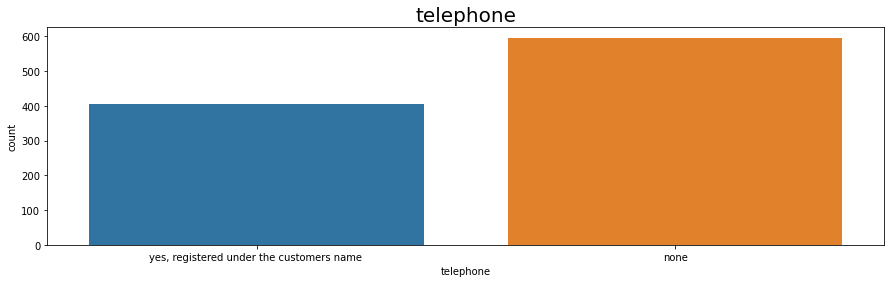

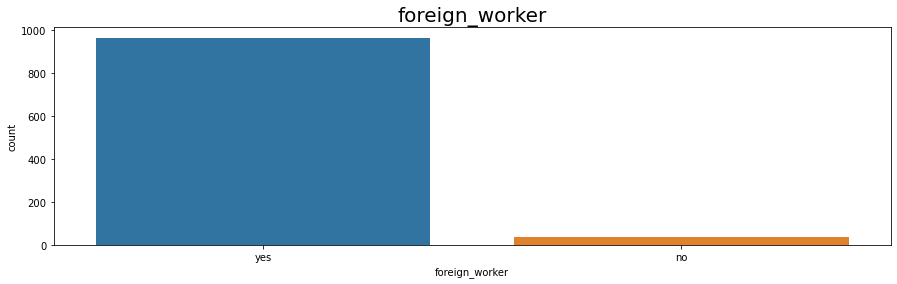

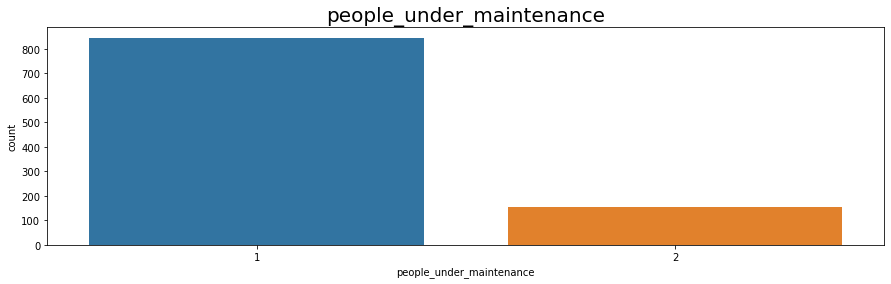

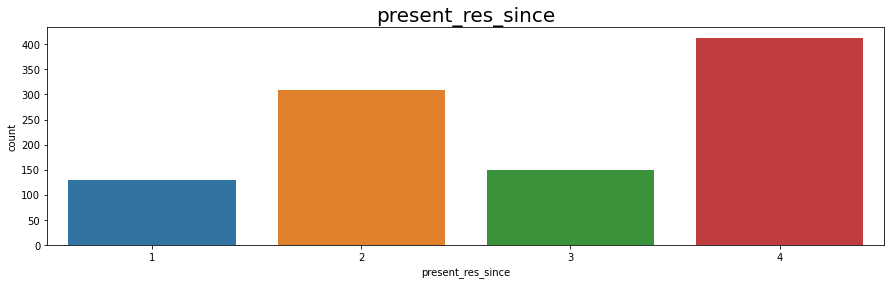

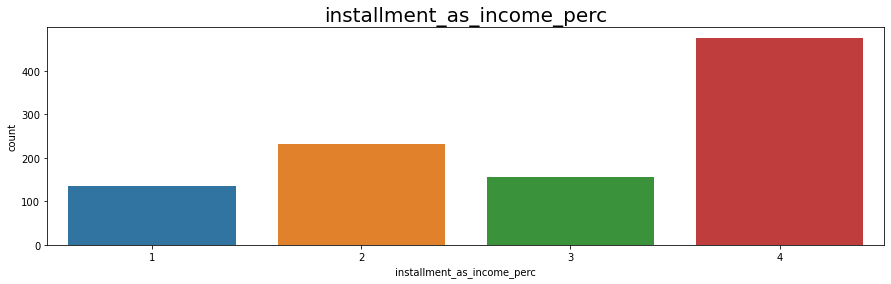

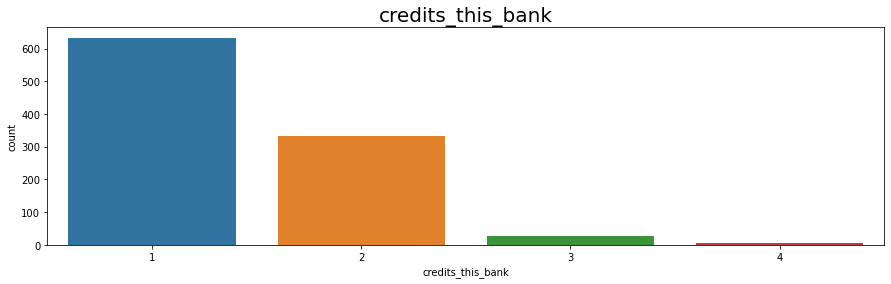

In [16]:
# Plot total counts for all categorical features
for feature in ['default','account_check_status','personal_status_sex','other_debtors','property','other_installment_plans',
'housing','job','credit_history','purpose','savings','present_emp_since','telephone','foreign_worker',
'people_under_maintenance','present_res_since','installment_as_income_perc','credits_this_bank']:
    fig, ax = plt.subplots(figsize=(15, 4))
    sns.countplot(df[feature].sort_values(ascending=False), ax=ax)
    plt.xticks(fontsize=10);
    plt.title(feature,fontsize=20)



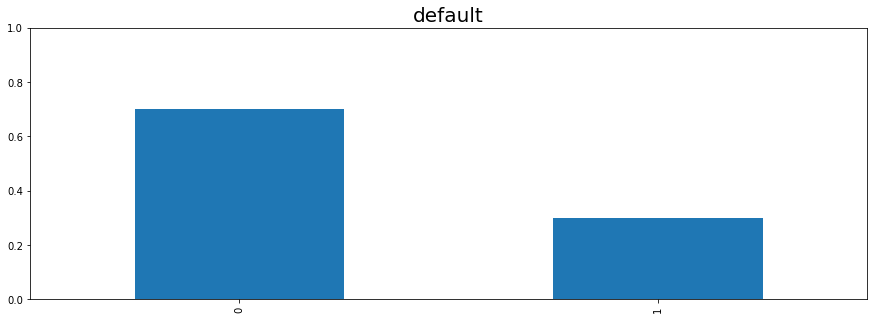

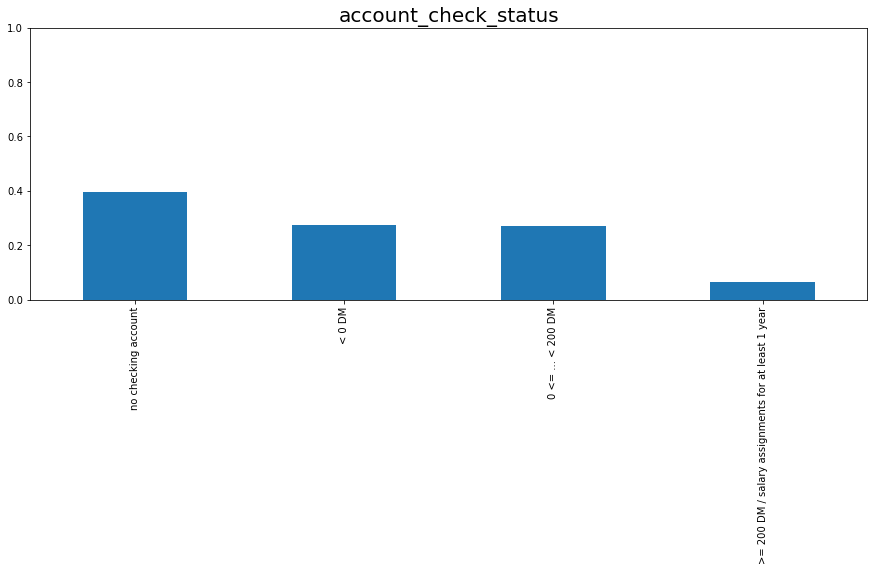

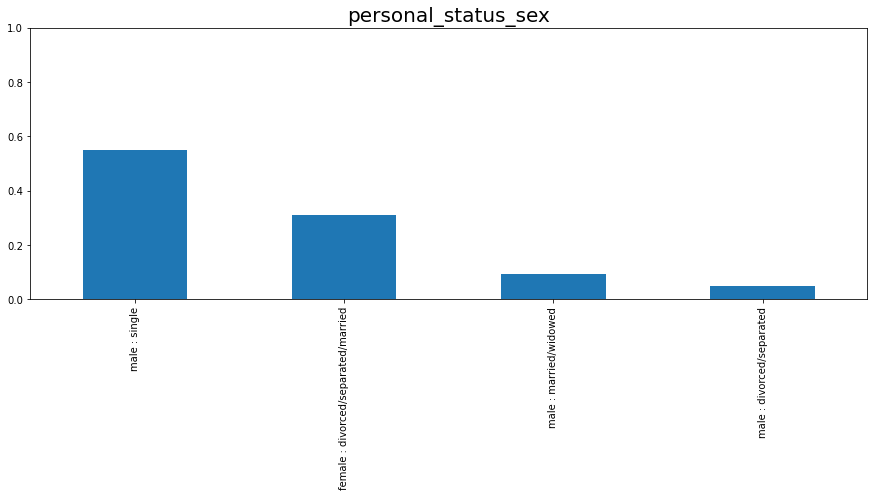

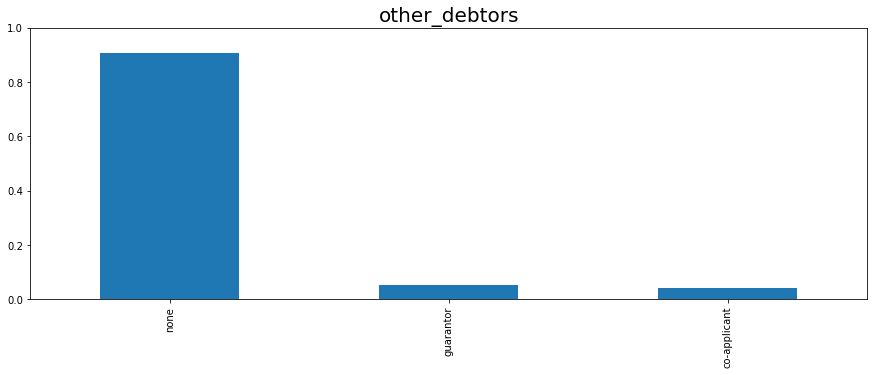

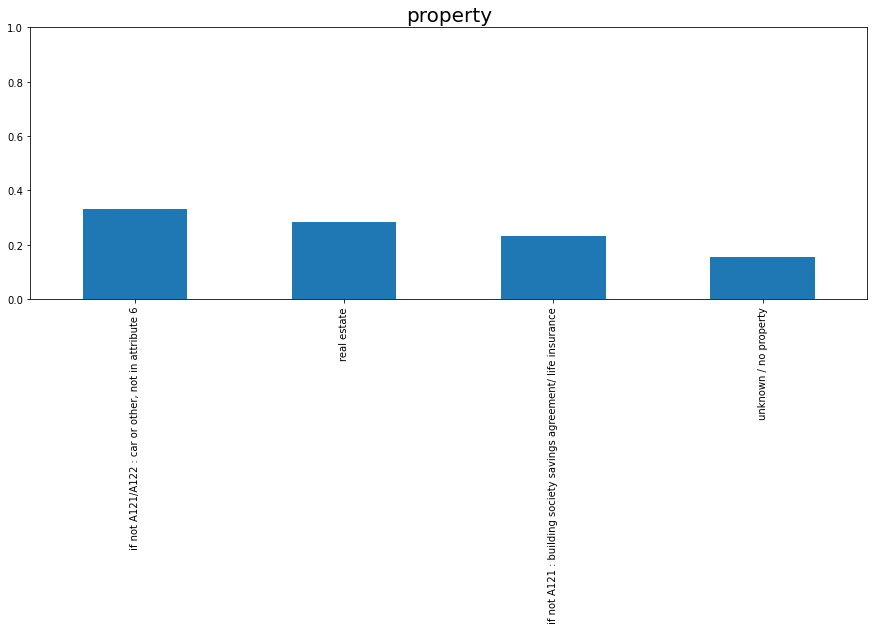

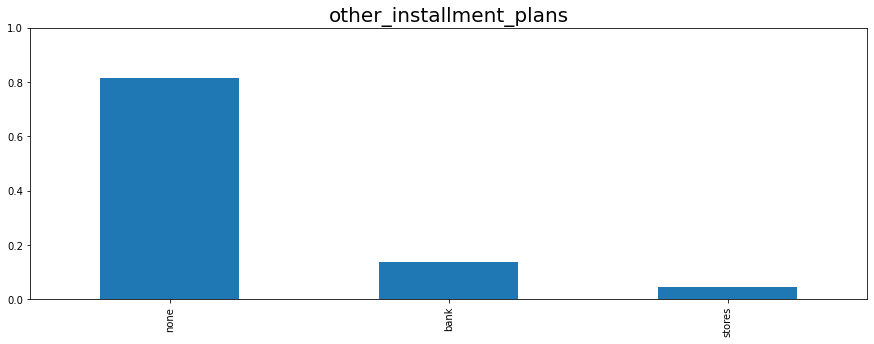

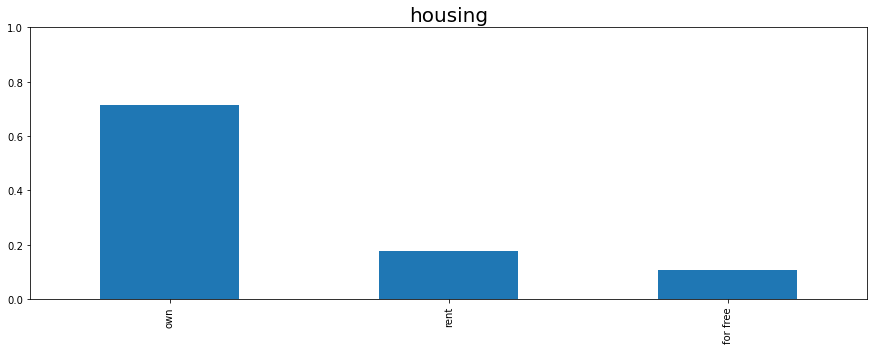

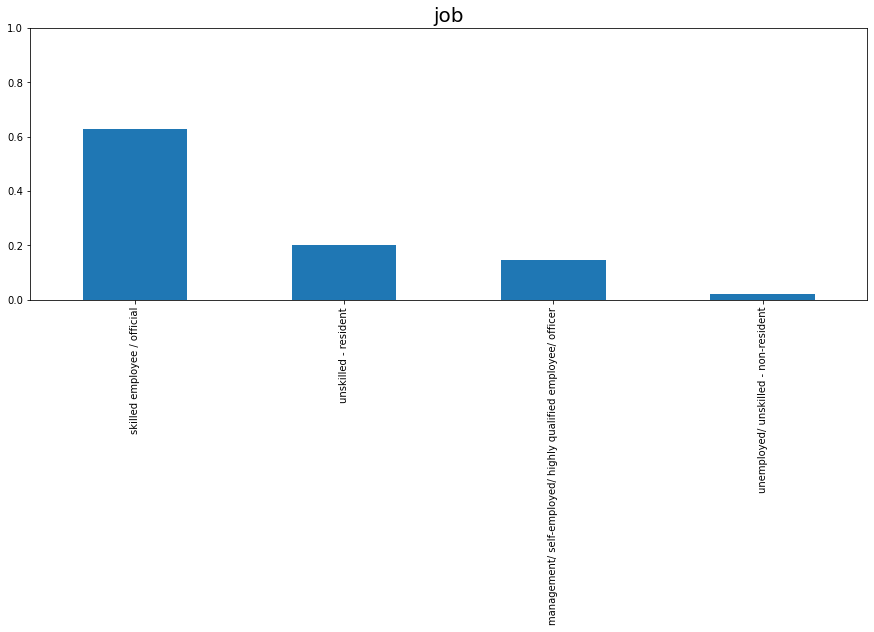

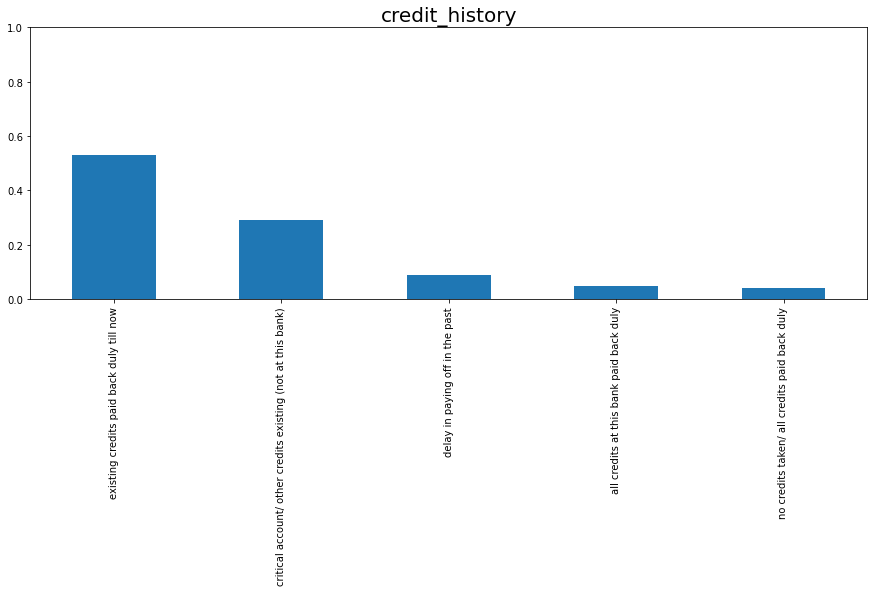

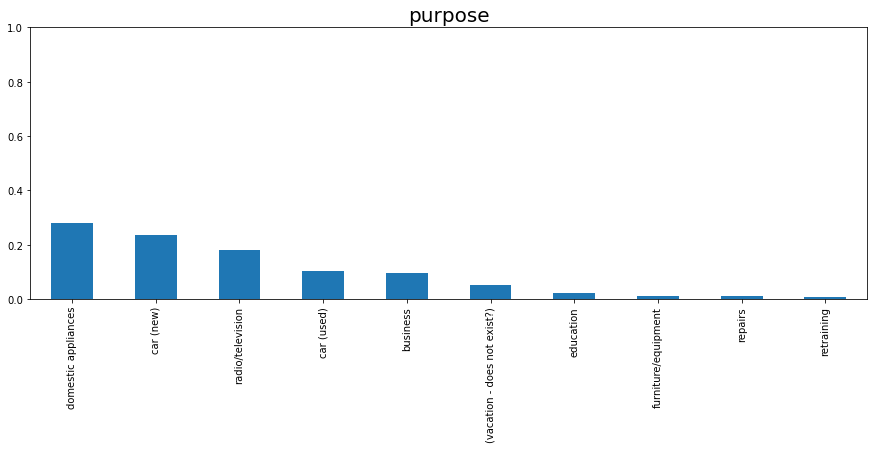

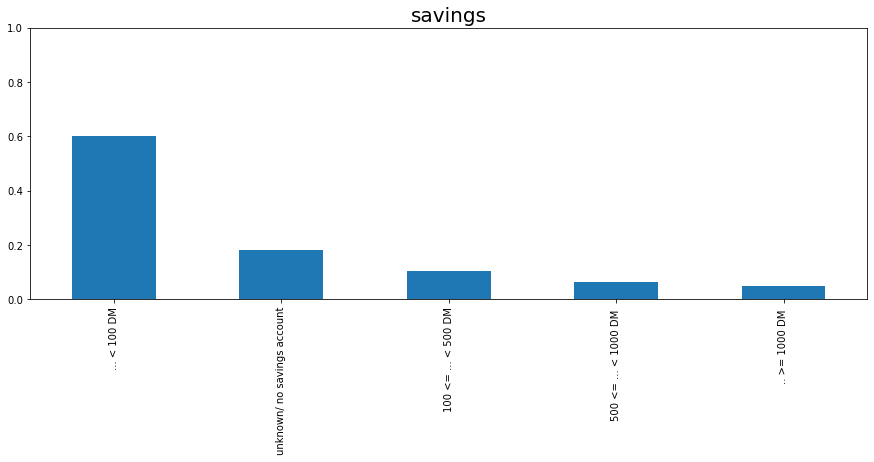

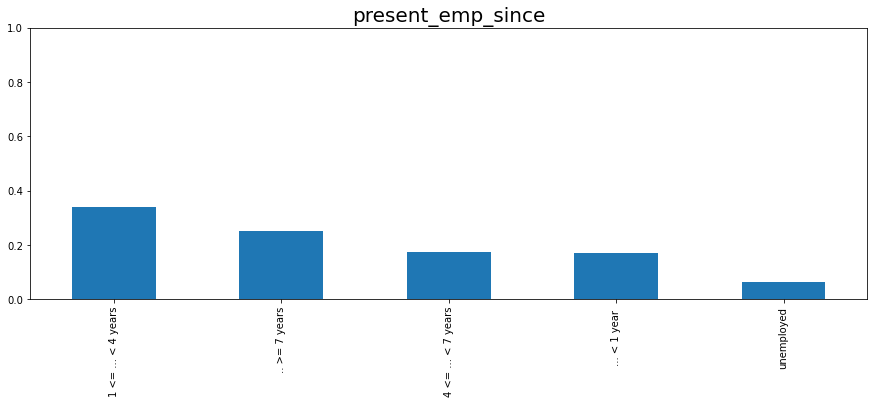

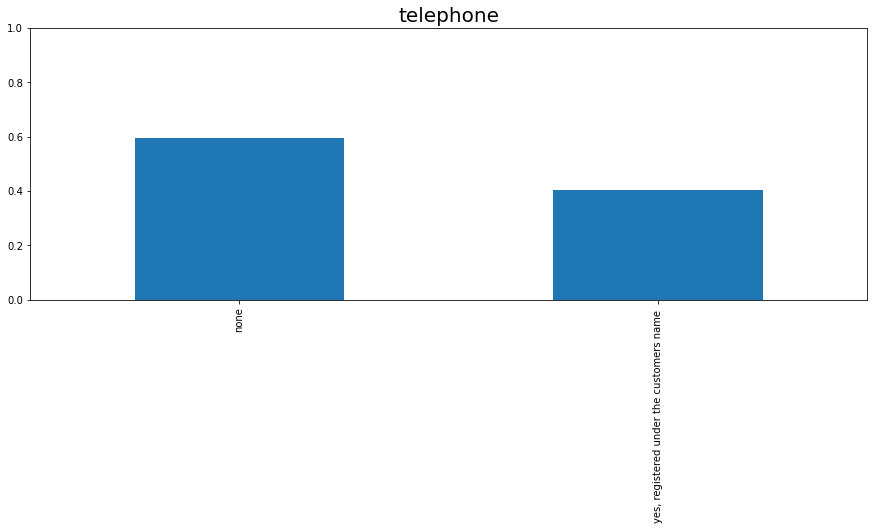

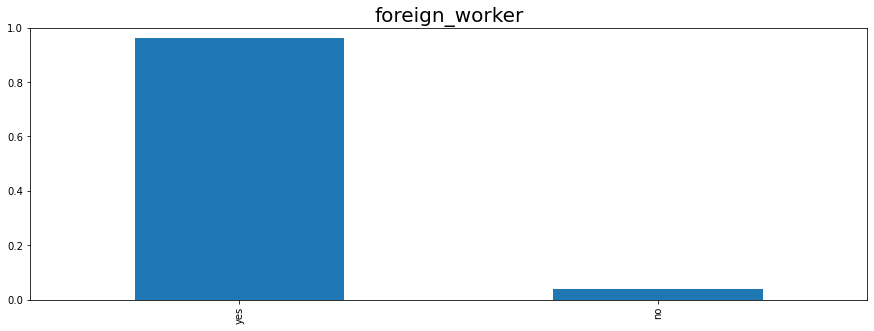

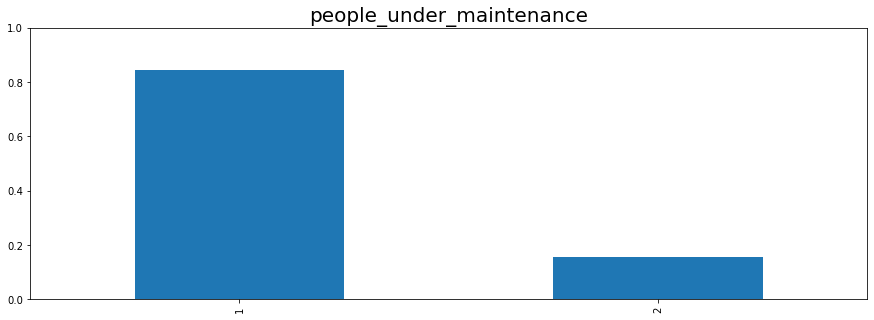

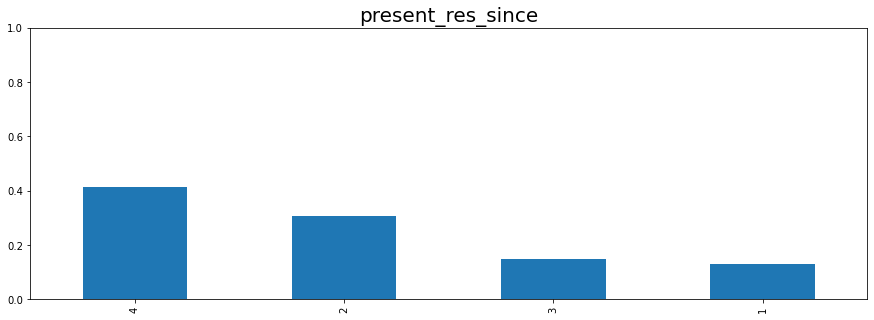

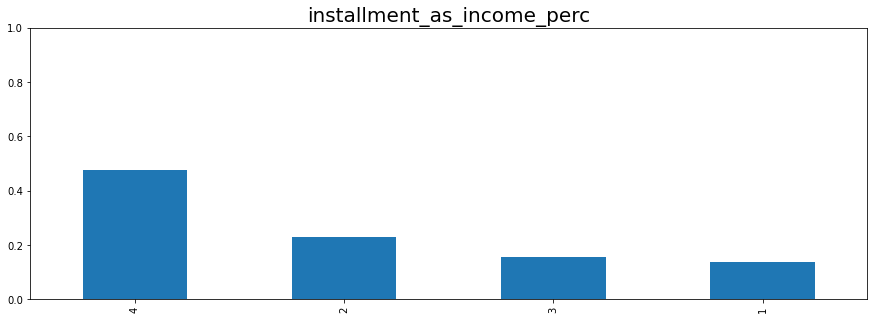

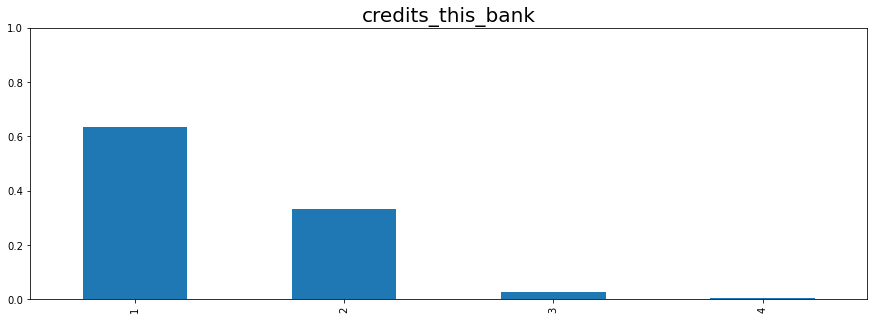

In [17]:
# Plot value counts (proportions) for all categorical features
for feature in ['default','account_check_status','personal_status_sex','other_debtors','property','other_installment_plans',
'housing','job','credit_history','purpose','savings','present_emp_since','telephone','foreign_worker',
'people_under_maintenance','present_res_since','installment_as_income_perc','credits_this_bank']:
    df[feature].value_counts(normalize=True).sort_values(ascending=False).plot.bar(figsize=(15,5))
    plt.ylim(0,1)
    plt.xticks(fontsize=10);
    plt.title(feature,fontsize=20)
    plt.show()

### Bivariate relationship

account_check_status




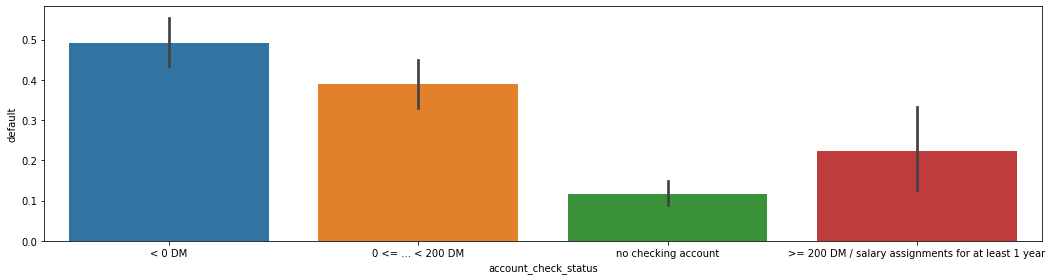

personal_status_sex




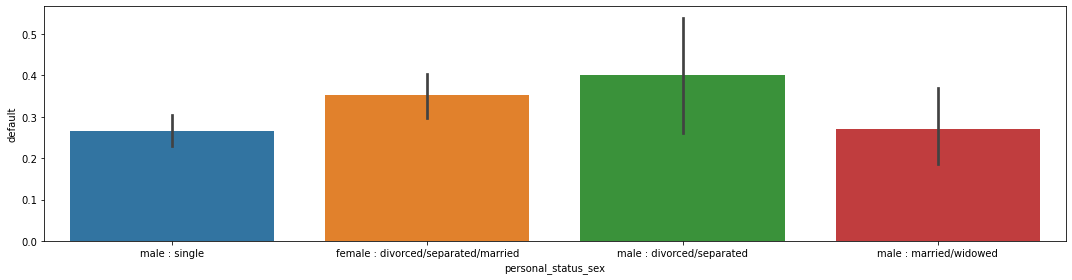

other_debtors




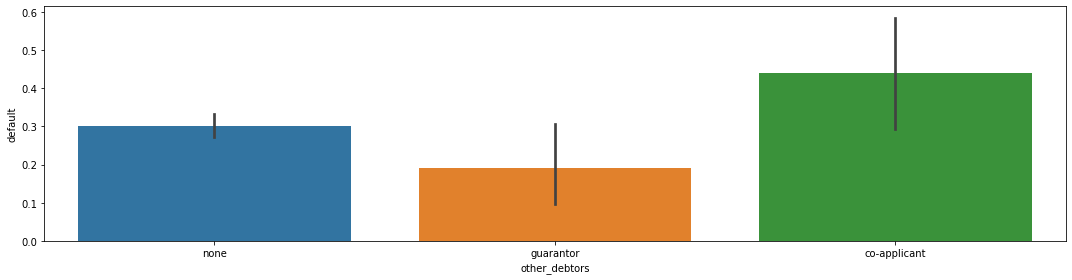

property




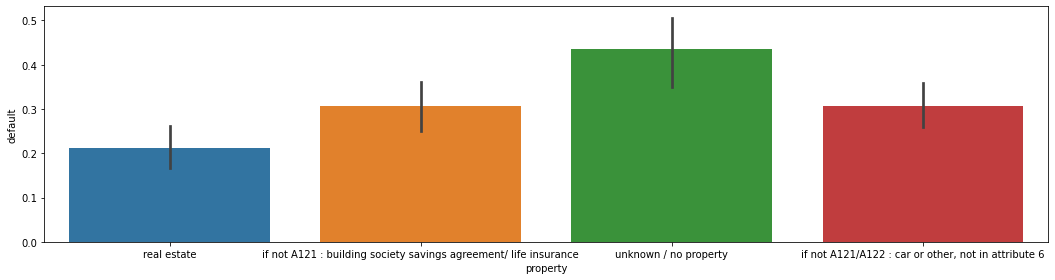

other_installment_plans




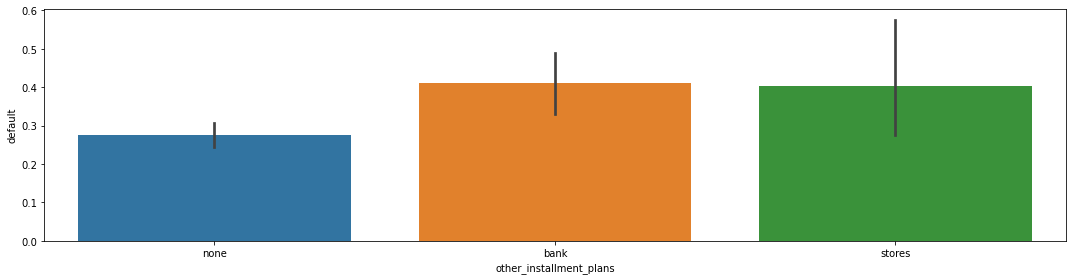

housing




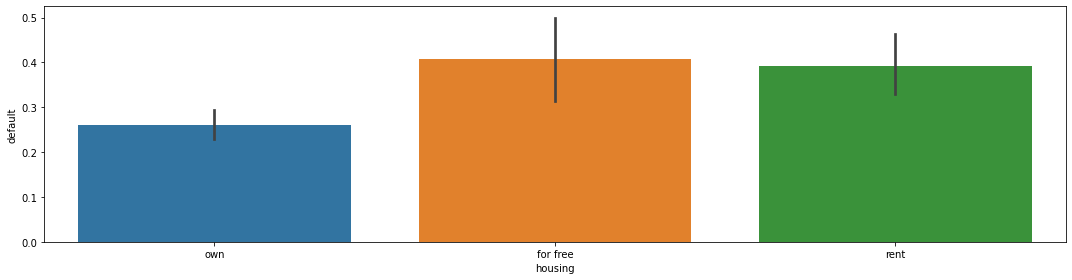

job




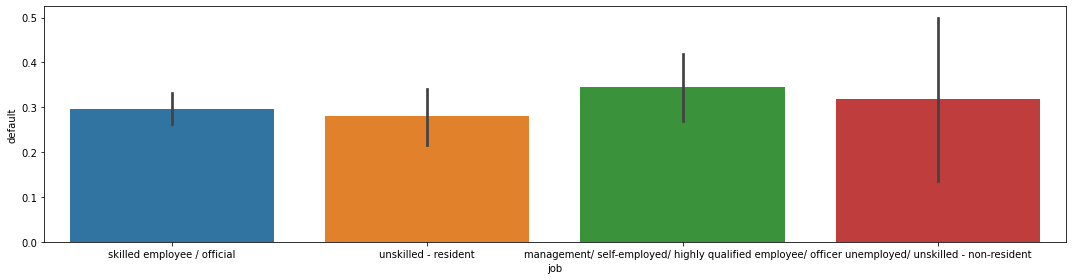

credit_history




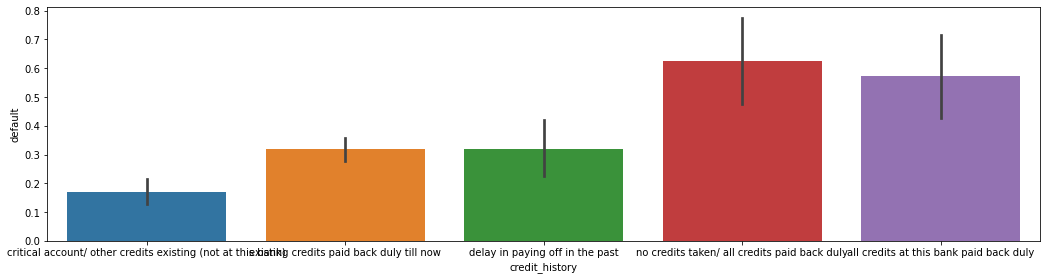

purpose




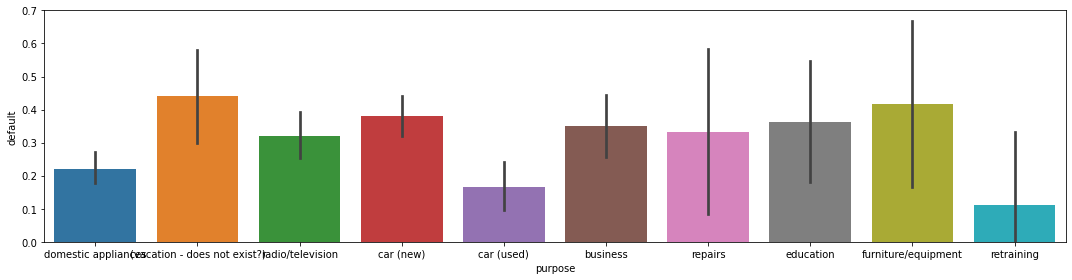

savings




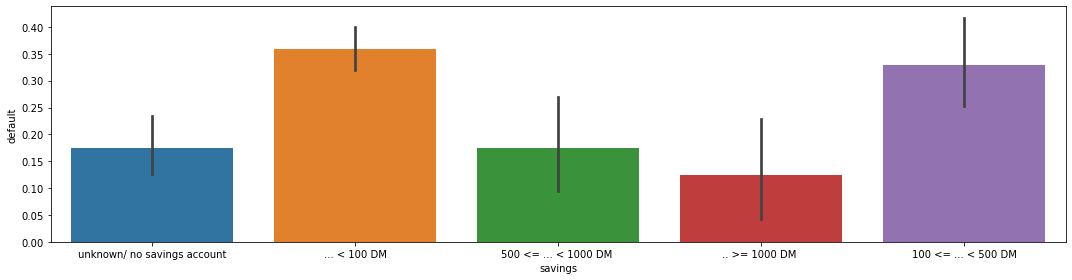

present_emp_since




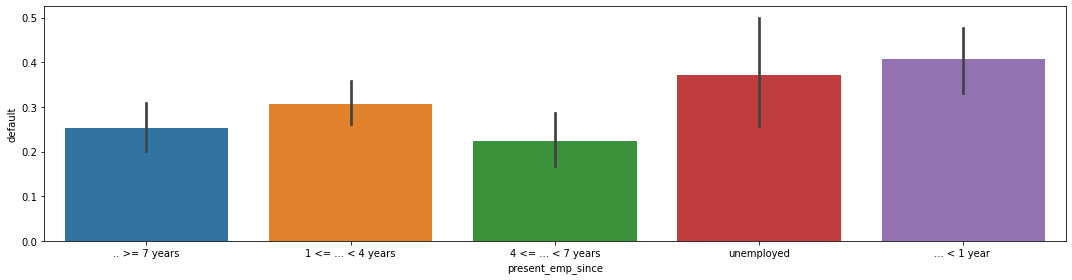

telephone




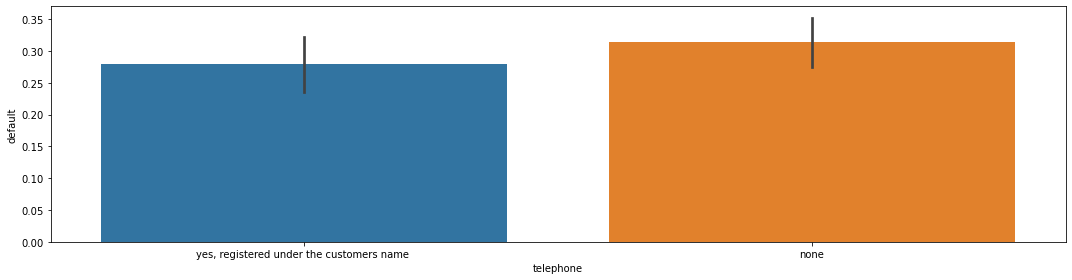

foreign_worker




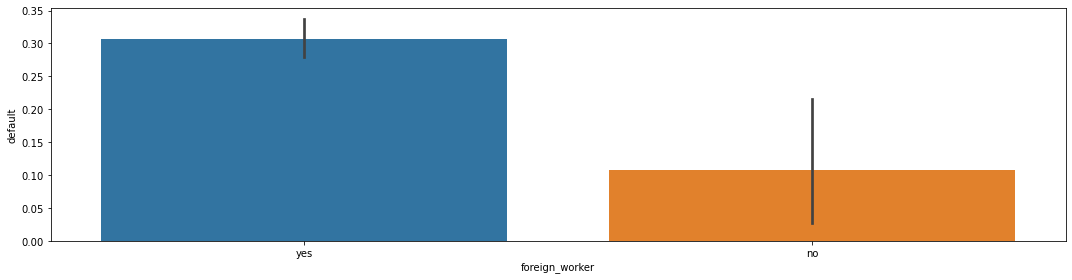

people_under_maintenance




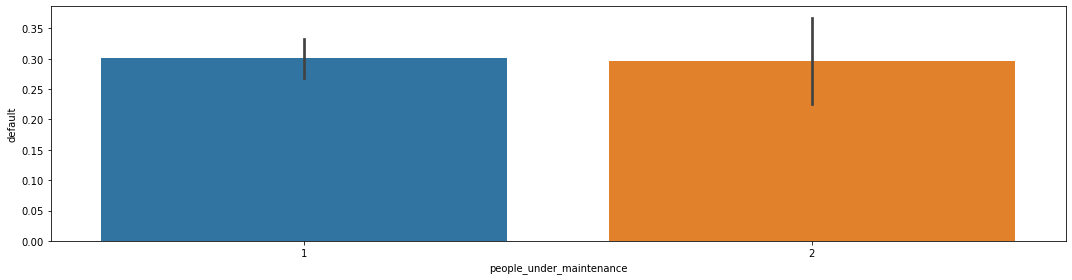

present_res_since




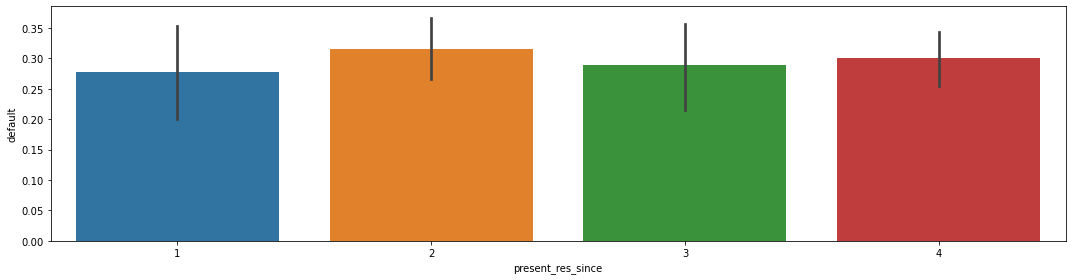

installment_as_income_perc




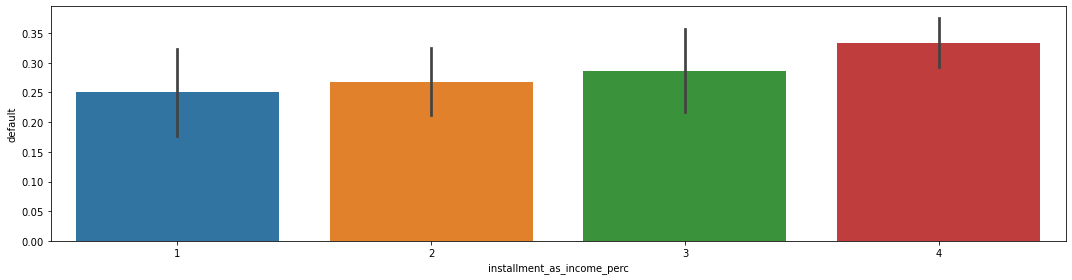

credits_this_bank




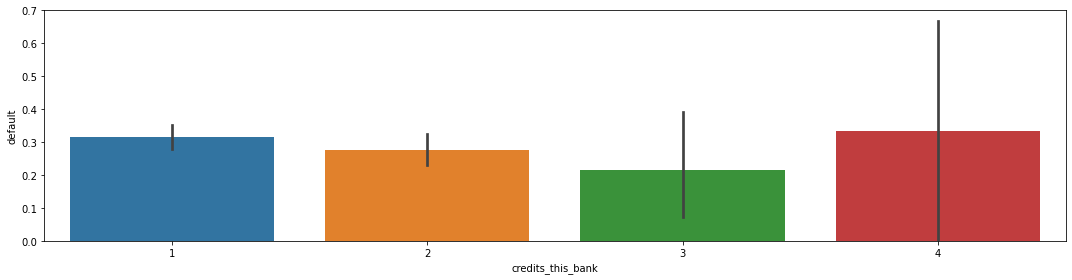

In [18]:
# Test different categorical variable relationship with Default variable - Bar Charts
for i in ['account_check_status','personal_status_sex','other_debtors','property','other_installment_plans',
'housing','job','credit_history','purpose','savings','present_emp_since','telephone','foreign_worker',
'people_under_maintenance','present_res_since','installment_as_income_perc','credits_this_bank']:
    print(i)
    print('\n')
    fig, ax = plt.subplots(figsize=(15, 4))
    sns.barplot(x=i,y='default',data=df,ax=ax)
    plt.tight_layout()
    plt.show()

In [19]:
# Test different categorical variable relationship with Default variable - Crosstab
for i in ['account_check_status','personal_status_sex','other_debtors','property','other_installment_plans',
'housing','job','credit_history','purpose','savings','present_emp_since','telephone','foreign_worker',
'people_under_maintenance','present_res_since','installment_as_income_perc','credits_this_bank']:
    print(i)
    print('\n')
    print(pd.crosstab(df[i],df['default'],normalize='index').sort_values(ascending=True,by=i))
    print('\n')

account_check_status


default                                                    0         1
account_check_status                                                  
0 <= ... < 200 DM                                   0.609665  0.390335
< 0 DM                                              0.507299  0.492701
>= 200 DM / salary assignments for at least 1 year  0.777778  0.222222
no checking account                                 0.883249  0.116751


personal_status_sex


default                                     0         1
personal_status_sex                                    
female : divorced/separated/married  0.648387  0.351613
male : divorced/separated            0.600000  0.400000
male : married/widowed               0.728261  0.271739
male : single                        0.733577  0.266423


other_debtors


default               0         1
other_debtors                    
co-applicant   0.560976  0.439024
guarantor      0.807692  0.192308
none           0.700110  0.299890


p

In [20]:
# Contigency Tables - to find relationship between default & input features
def get_ct(df,var):
    ct_res = pd.crosstab(df[var],df['default'],margins=True)
    ct_res['Default(%)'] = round((ct_res[1]/ct_res['All'])*100,2)
    return ct_res.drop(columns='All')

In [21]:
get_ct(df,'present_res_since')
# Can be used as is 

default,0,1,Default(%)
present_res_since,,,
1,94,36,27.69
2,211,97,31.49
3,106,43,28.86
4,289,124,30.02
All,700,300,30.00


In [22]:
get_ct(df,'credits_this_bank')
# credits this bank group 1 , 2-3-4 together if makes sense

default,0,1,Default(%)
credits_this_bank,,,
1,433,200,31.60
2,241,92,27.63
3,22,6,21.43
4,4,2,33.33
All,700,300,30.00


In [23]:
get_ct(df,'installment_as_income_perc')
# Label Encoding

default,0,1,Default(%)
installment_as_income_perc,,,
1,102,34,25.00
2,169,62,26.84
3,112,45,28.66
4,317,159,33.40
All,700,300,30.00


In [24]:
# Label Encoding to int type
df['installment_as_income_perc'] = df['installment_as_income_perc'].astype(int)

In [25]:
# Find relationships between default and two features to find more relationships
def get_ct2(df,var,stra_var):
    ct_res = pd.crosstab(index=[df[stra_var],df[var]],columns=df.default,margins=True)
    ct_res['Default %'] = round(ct_res[1]/ct_res['All']*100,2)
    return ct_res.drop(columns='All').drop('All',level=0)

In [26]:
get_ct2(df,'credit_history','personal_status_sex')

default                                                                                   0  \
personal_status_sex                 credit_history                                            
female : divorced/separated/married all credits at this bank paid back duly               5   
                                    critical account/ other credits existing (not a...   63   
                                    delay in paying off in the past                      13   
                                    existing credits paid back duly till now            117   
                                    no credits taken/ all credits paid back duly          3   
male : divorced/separated           all credits at this bank paid back duly               0   
                                    critical account/ other credits existing (not a...    9   
                                    delay in paying off in the past                       2   
                                    existing credits paid back duly till now             17   
                                    no credits taken/ all credits paid back duly          2   
male : married/widowed              all credits at this bank paid back duly               1   
                                    critical account/ other credits existing (not a...   15   
                                    delay in paying off in the past                       5   
                                    existing credits paid back duly till now             44   
                                    no credits taken/ all credits paid back duly          2   
male : single                       all credits at this bank paid back duly              15   
                                    critical account/ other credits existing (not a...  156   
                                    delay in paying off in the past                      40   
                                    existing credits paid back duly till now            183   
                                    no credits taken/ all credits paid back duly          8   

default                                                                                  1  \
personal_status_sex                 credit_history                                           
female : divorced/separated/married all credits at this bank paid back duly             12   
                                    critical account/ other credits existing (not a...  16   
                                    delay in paying off in the past                      3   
                                    existing credits paid back duly till now            69   
                                    no credits taken/ all credits paid back duly         9   
male : divorced/separated           all credits at this bank paid back duly              2   
                                    critical account/ other credits existing (not a...   4   
                                    delay in paying off in the past                      3   
                                    existing credits paid back duly till now            11   
                                    no credits taken/ all credits paid back duly         0   
male : married/widowed              all credits at this bank paid back duly              1   
                                    critical account/ other credits existing (not a...   5   
                                    delay in paying off in the past                      3   
                                    existing credits paid back duly till now            16   
                                    no credits taken/ all credits paid back duly         0   
male : single                       all credits at this bank paid back duly             13   
                                    critical account/ other credits existing (not a...  25   
                                    delay in paying off in the past                     19   
                             

In [27]:
get_ct2(df,'account_check_status','credit_history')
# look for ways to find interesting relationships such as Default % low for no checking account & existing credits paid back duly

default                                                                                                  0  \
credit_history                                     account_check_status                                      
all credits at this bank paid back duly            0 <= ... < 200 DM                                     6   
                                                   < 0 DM                                                6   
                                                   >= 200 DM / salary assignments for at least 1 year    2   
                                                   no checking account                                   7   
critical account/ other credits existing (not a... 0 <= ... < 200 DM                                    37   
                                                   < 0 DM                                               49   
                                                   >= 200 DM / salary assignments for at least 1 year   14   
                                                   no checking account                                 143   
delay in paying off in the past                    0 <= ... < 200 DM                                    26   
                                                   < 0 DM                                                3   
                                                   >= 200 DM / salary assignments for at least 1 year    2   
                                                   no checking account                                  29   
existing credits paid back duly till now           0 <= ... < 200 DM                                    89   
                                                   < 0 DM                                               78   
                                                   >= 200 DM / salary assignments for at least 1 year   30   
                                                   no checking account                                 164   
no credits taken/ all credits paid back duly       0 <= ... < 200 DM                                     6   
                                                   < 0 DM                                                3   
                                                   >= 200 DM / salary assignments for at least 1 year    1   
                                                   no checking account                                   5   

default                                                                                                 1  \
credit_history                                     account_check_status                                     
all credits at this bank paid back duly            0 <= ... < 200 DM                                    9   
                                                   < 0 DM                                              16   
                                                   >= 200 DM / salary assignments for at least 1 year   1   
                                                   no checking account                                  2   
critical account/ other credits existing (not a... 0 <= ... < 200 DM                                   18   
                                                   < 0 DM                                              18   
                                                   >= 200 DM / salary assignments for at least 1 year   4   
                                                   no checking account                                 10   
delay in paying off in the past                    0 <= ... < 200 DM                                    9   
                                                   < 0 DM                                               9   
                                                   >= 200 DM / salary assignments for at least 1 year   1   
                                                   no checking account                                  9   
existing credits paid back duly till now           0 

In [28]:
# Look at distribution for continous variable
df[['age','credit_amount','duration_in_month']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


Text(0.5, 1.0, 'age')

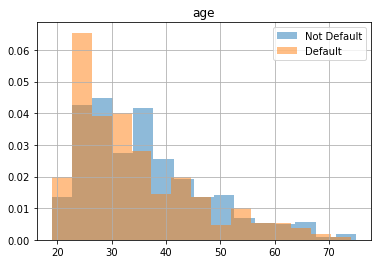

In [29]:
# Hist plot for relationship between continous variable and default variable
df['age'][df['default'] == 0].hist(bins=15,density=True,alpha=0.5,label='Not Default')
df['age'][df['default'] == 1].hist(bins=15,density=True,alpha=0.5,label='Default')
plt.legend()
plt.title('age')

Text(0.5, 1.0, 'credit_amount')

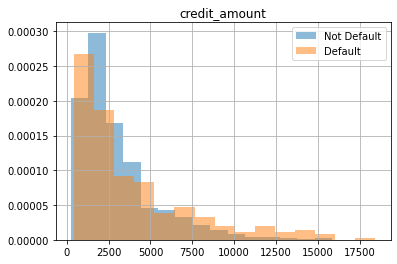

In [30]:
df['credit_amount'][df['default'] == 0].hist(bins=15,density=True,alpha=0.5,label='Not Default')
df['credit_amount'][df['default'] == 1].hist(bins=15,density=True,alpha=0.5,label='Default')
plt.legend()
plt.title('credit_amount')

Text(0.5, 1.0, 'duration_in_month')

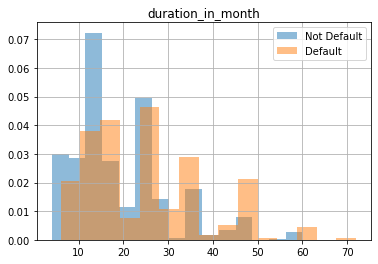

In [31]:
df['duration_in_month'][df['default'] == 0].hist(bins=15,density=True,alpha=0.5,label='Not Default')
df['duration_in_month'][df['default'] == 1].hist(bins=15,density=True,alpha=0.5,label='Default')
plt.legend()
plt.title('duration_in_month')

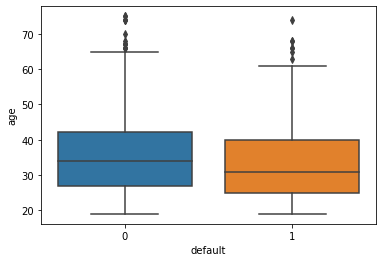

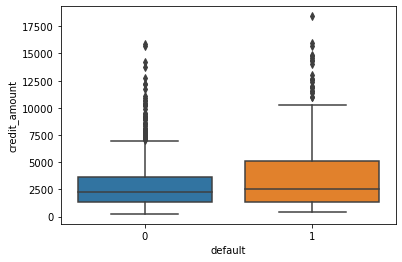

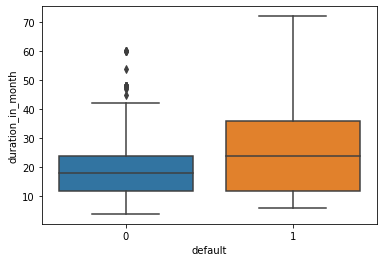

In [32]:
# Box plot for relationship between continous variable and default variable
for i in ['age','credit_amount','duration_in_month']:
    sns.boxplot(x='default',y=i,data=df)
    plt.show()

In [33]:
# Binning for age as it improves model interpretation
interval = (18,25,35,60,120)
cats = ['Young','Young Adult','Adult','Senior']
df["Age_cat"] = pd.cut(df['age'],interval,labels=cats)
df["Age_cat"].value_counts()

Young Adult    398
Adult          367
Young          190
Senior          45
Name: Age_cat, dtype: int64

In [34]:
# Default % changes based on age category so interesting feature to be used in the model
get_ct(df,'Age_cat')

default,0,1,Default(%)
Age_cat,,,
Young,110,80,42.11
Young Adult,280,118,29.65
Adult,275,92,25.07
Senior,35,10,22.22
All,700,300,30.00


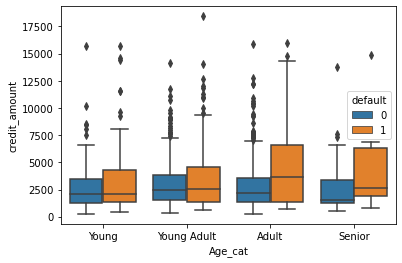

In [35]:
# Relationship between age, default and credit amount.
sns.boxplot(x='Age_cat',y='credit_amount',data=df,hue='default')
# Deaggregate data and splitting it up to see some of the relationships.

In [36]:
# Categorical Variables
obj_df=df.select_dtypes(include=['object'])
obj_df.head()
# Think about using diff encoding methods such as Mean Encoding, Frequency Encoding.

,account_check_status,credit_history,purpose,savings,present_emp_since,personal_status_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker
0,< 0 DM,critical account/ other credits existing (not ...,domestic appliances,unknown/ no savings account,.. >= 7 years,male : single,none,real estate,none,own,skilled employee / official,"yes, registered under the customers name",yes
1,0 <= ... < 200 DM,existing credits paid back duly till now,domestic appliances,... < 100 DM,1 <= ... < 4 years,female : divorced/separated/married,none,real estate,none,own,skilled employee / official,none,yes
2,no checking account,critical account/ other credits existing (not ...,(vacation - does not exist?),... < 100 DM,4 <= ... < 7 years,male : single,none,real estate,none,own,unskilled - resident,none,yes
3,< 0 DM,existing credits paid back duly till now,radio/television,... < 100 DM,4 <= ... < 7 years,male : single,guarantor,if not A121 : building society savings agreeme...,none,for free,skilled employee / official,none,yes
4,< 0 DM,delay in paying off in the past,car (new),... < 100 DM,1 <= ... < 4 years,male : single,none,unknown / no property,none,for free,skilled employee / official,none,yes


In [37]:
# Create data set with one hot encoding features
dff=pd.get_dummies(df, drop_first=True)

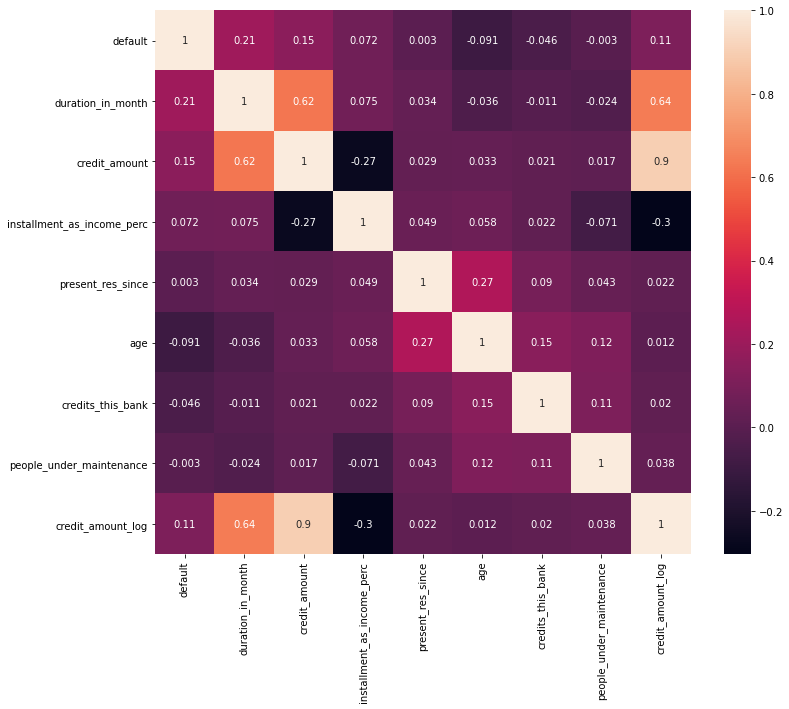

In [38]:
# Correlation between duration in month and credit amount
cor = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True)


In [39]:
# Lets check for highly correlated variables
cor= dff.corr()
cor.loc[:,:] = np.tril(cor,k=-1)
cor=cor.stack()
cor[(cor > 0.5) | (cor< -0.5)]

credit_amount                                                               duration_in_month                                                             0.624984
credit_amount_log                                                           duration_in_month                                                             0.640814
                                                                            credit_amount                                                                 0.901375
credit_history_critical account/ other credits existing (not at this bank)  credits_this_bank                                                             0.501364
credit_history_existing credits paid back duly till now                     credits_this_bank                                                            -0.540354
                                                                            credit_history_critical account/ other credits existing (not at this bank)   -0.683617
savings_unknown/ no sa

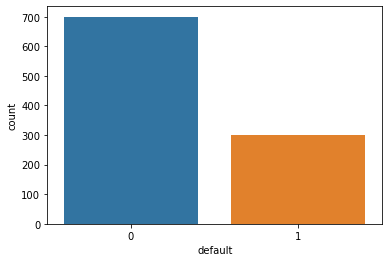

In [40]:
sns.countplot(x='default',data=dff)  # Imbalance - not that high. 

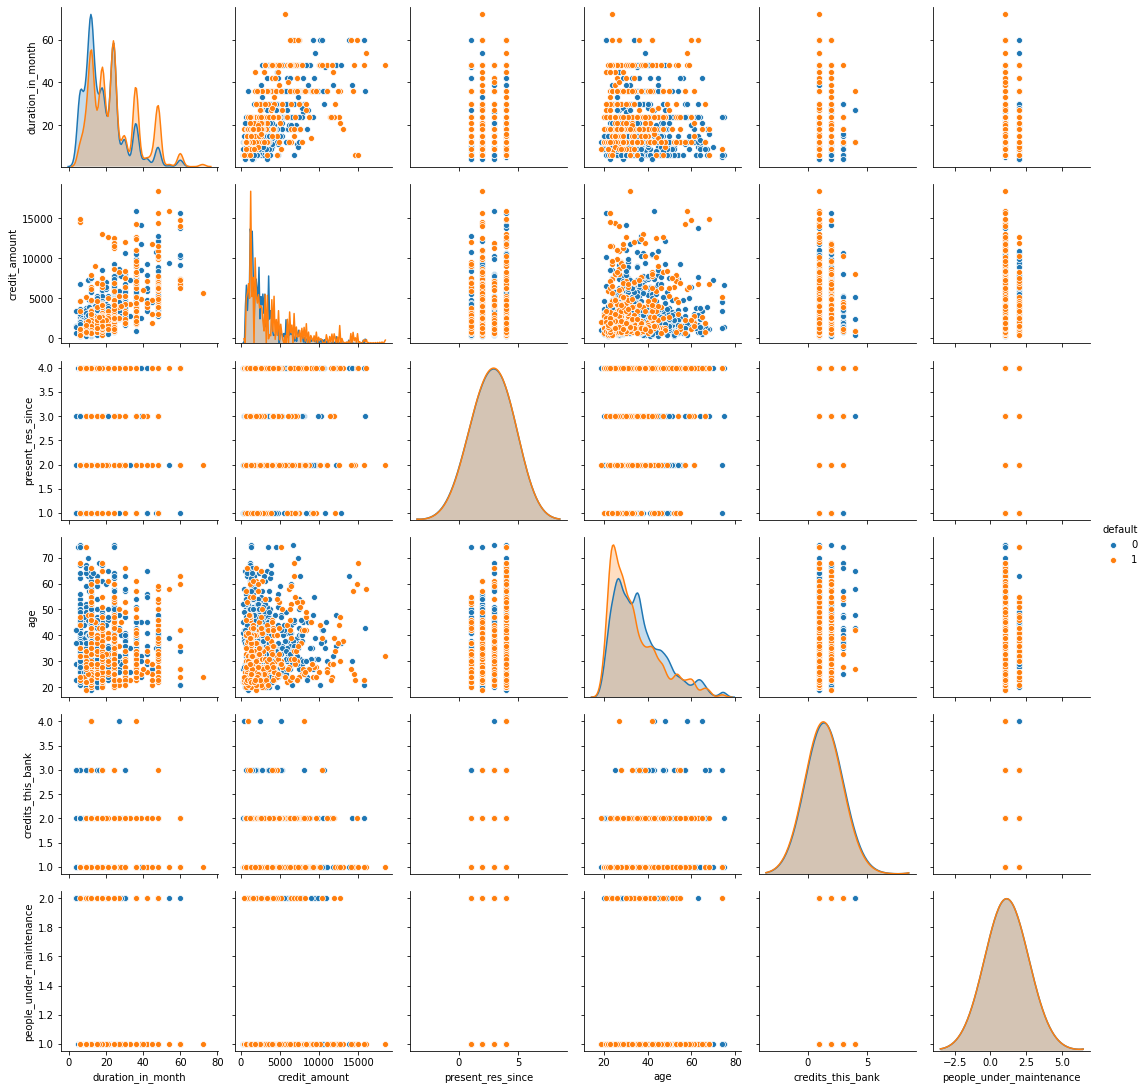

In [41]:
sns.pairplot(dff.select_dtypes(include=['int64']),hue='default',diag_kws={'bw':1.5})
## dist thoughts - Class distribution similar for a few features based on diagnol plots


In [42]:
## Final Variables to be used for modelling
dff.columns

Index(['default', 'duration_in_month', 'credit_amount',
       'installment_as_income_perc', 'present_res_since', 'age',
       'credits_this_bank', 'people_under_maintenance', 'credit_amount_log',
       'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'purpose_business', 'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/television',
       'purpose_repairs', 'purpose_retraining', 'savings_... < 100 DM',
       'savings_100 <= ... < 500 DM', 'savings_500 <= ... < 1000 DM ',
       'savings

## Run Initial Models - RF & Lasso

In [43]:
# Split Train/Test data 70:30 ratio
from sklearn.model_selection import train_test_split

y = dff['default']
X = dff.drop(['default','age','credit_amount_log'],axis=1)

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 50), (300, 50), (700,), (300,))

In [44]:
X_train.columns

Index(['duration_in_month', 'credit_amount', 'installment_as_income_perc',
       'present_res_since', 'credits_this_bank', 'people_under_maintenance',
       'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'purpose_business', 'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/television',
       'purpose_repairs', 'purpose_retraining', 'savings_... < 100 DM',
       'savings_100 <= ... < 500 DM', 'savings_500 <= ... < 1000 DM ',
       'savings_unknown/ no savings account',
       'present

In [45]:
#Build RF Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=42)
rfm=rf.fit(X_train, y_train)

In [46]:
preds = rf.predict_proba(X_test)[:,1]
y_pred=rf.predict(X_test)

In [47]:
#calculate Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def calculate_confusion_matrix( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

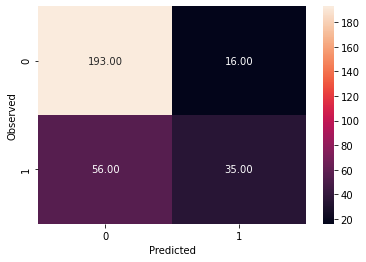

In [48]:
calculate_confusion_matrix(y_test, y_pred)

In [49]:
print(accuracy_score(y_test, y_pred))

0.76


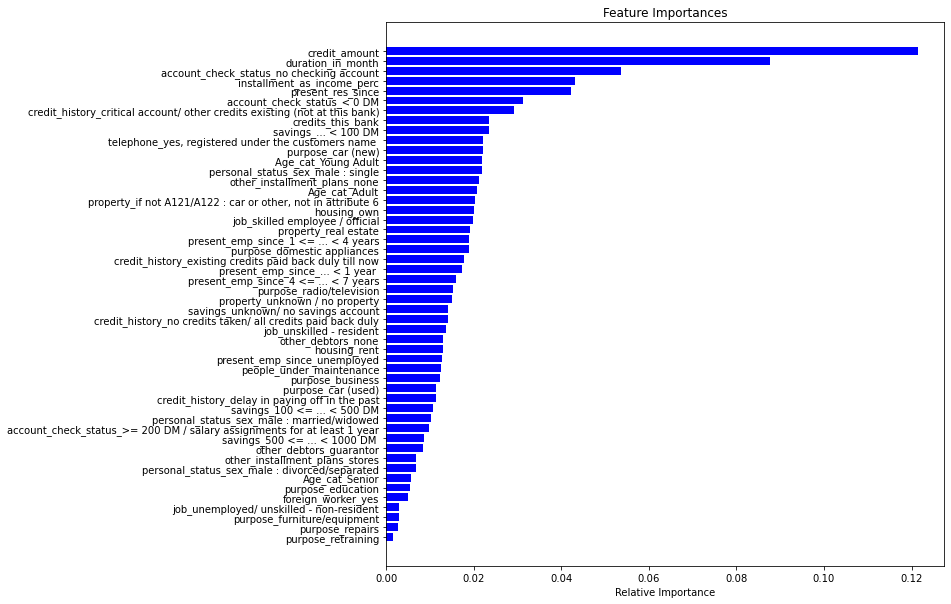

In [50]:
# View a list of the features and their importance scores
importances = rf.feature_importances_
indices = np.argsort(importances)[::1][:]
a = X.columns[:]
features= a
#plot it
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()


In [51]:
# Dataset with columns and variable importance values
df_rf_imp = pd.DataFrame(features[indices],importances[indices])
df_rf_imp.reset_index(inplace=True)
df_rf_imp.columns=['value','column']

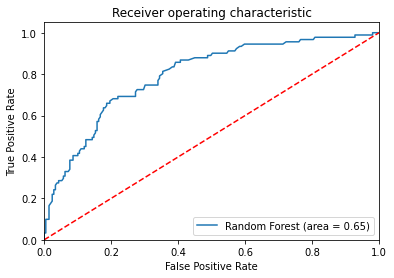

In [52]:
#AUC ROC curve
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score,roc_auc_score,roc_curve
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [53]:
trainResult = rf.score(X_train, y_train)
testResult = rf.score(X_test, y_test)

In [54]:
"Train Accuracy:"
(trainResult*100.0)
# overfitting

100.0

In [55]:
"Test Accuracy:"
(testResult*100.0)

76.0

In [56]:
#Recall
print(f'Recall:{round(recall_score(y_test,y_pred,pos_label=1)*100,2)}%')

Recall:38.46%


###### Lasso 

In [57]:
dff.columns

Index(['default', 'duration_in_month', 'credit_amount',
       'installment_as_income_perc', 'present_res_since', 'age',
       'credits_this_bank', 'people_under_maintenance', 'credit_amount_log',
       'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'purpose_business', 'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/television',
       'purpose_repairs', 'purpose_retraining', 'savings_... < 100 DM',
       'savings_100 <= ... < 500 DM', 'savings_500 <= ... < 1000 DM ',
       'savings

In [58]:
# Split Train/Test data 70:30 ratio

y = dff['default']
X = dff.drop(['default','age','credit_amount'],axis=1)

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 50), (300, 50), (700,), (300,))

In [59]:
# Lasso Regression
from sklearn.linear_model import LogisticRegression
log_lasso = LogisticRegression(C=1, penalty='l1',solver='liblinear')
log_lasso.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [60]:
y_pred=log_lasso.predict(X_test)

In [61]:
trainResult = log_lasso.score(X_train, y_train)
trainResult

0.7857142857142857

In [62]:
testResult = log_lasso.score(X_test, y_test)
testResult

0.7833333333333333

In [63]:
# Data Frame with columns and coefficients
arr = X_train.columns
lasso_coef = log_lasso.coef_[0]
df_lasso_imp = pd.DataFrame(arr,lasso_coef).reset_index()
df_lasso_imp.columns = ['value','column']

In [64]:
df_lasso_imp.loc[df_lasso_imp['value']==0]

,value,column
5,0.0,credit_amount_log
13,0.0,purpose_business
17,0.0,purpose_education
18,0.0,purpose_furniture/equipment
20,0.0,purpose_repairs
24,0.0,savings_500 <= ... < 1000 DM
25,0.0,savings_unknown/ no savings account
29,0.0,present_emp_since_unemployed
31,0.0,personal_status_sex_male : married/widowed
34,0.0,other_debtors_none


In [65]:
df_rf_imp.sort_values(ascending=True,by='value')

,value,column
0,0.001505,purpose_retraining
1,0.002702,purpose_repairs
2,0.002862,purpose_furniture/equipment
3,0.003027,job_unemployed/ unskilled - non-resident
4,0.005076,foreign_worker_yes
5,0.005472,purpose_education
6,0.005749,Age_cat_Senior
7,0.006732,personal_status_sex_male : divorced/separated
8,0.006828,other_installment_plans_stores
9,0.008293,other_debtors_guarantor


In [66]:
dff.columns

Index(['default', 'duration_in_month', 'credit_amount',
       'installment_as_income_perc', 'present_res_since', 'age',
       'credits_this_bank', 'people_under_maintenance', 'credit_amount_log',
       'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'purpose_business', 'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/television',
       'purpose_repairs', 'purpose_retraining', 'savings_... < 100 DM',
       'savings_100 <= ... < 500 DM', 'savings_500 <= ... < 1000 DM ',
       'savings

In [67]:
# Columns to be dropped based on them not being important on Lasso & Random Forest
dff_featdrop = dff.drop(['credit_amount_log',
'purpose_business',
'purpose_education',
'purpose_furniture/equipment',
'purpose_repairs',
'savings_500 <= ... < 1000 DM ',
'savings_unknown/ no savings account',
'present_emp_since_unemployed',
'personal_status_sex_male : married/widowed',
'other_debtors_none',
'other_installment_plans_stores',
'job_unemployed/ unskilled - non-resident'],axis=1)

# When have 1000 data pts and too many features -> careful as model wont be able to work well - reduce space options less
# model generalize better

## Model after removing features

In [68]:
# Split Train/Test data 70:30 ratio
from sklearn.model_selection import train_test_split

y = dff_featdrop['default']
X = dff_featdrop.drop(['default','age'],axis=1)

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 39), (300, 39), (700,), (300,))

In [69]:
#Build RF Model
from sklearn.ensemble import RandomForestClassifier
rf_less = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=42)
rfm_less=rf_less.fit(X_train, y_train)

In [70]:
y_pred_less=rf_less.predict(X_test)

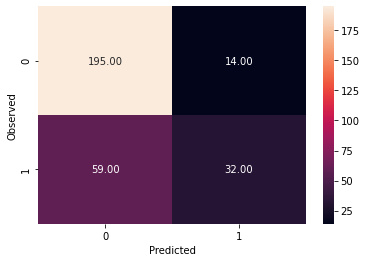

In [71]:
calculate_confusion_matrix(y_test, y_pred_less)

In [72]:
trainResult = rf_less.score(X_train, y_train)
trainResult

1.0

In [73]:
testResult = rf_less.score(X_test, y_test)
testResult  # around the same

0.7566666666666667

In [74]:
#Recall
print(f'Recall:{round(recall_score(y_test,y_pred_less,pos_label=1)*100,2)}%') # Drop from 38 to 35

Recall:35.16%


### Use Smote and see if improve results for Recall

In [75]:
from imblearn.over_sampling import SMOTE
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))

Before UpSampling, counts of label '1': 209
Before UpSampling, counts of label '0': 491 

After UpSampling, counts of label '1': 491
After UpSampling, counts of label '0': 491 



In [76]:
#Build RF Model
from sklearn.ensemble import RandomForestClassifier
rf_smote = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=42)
rfm_smote=rf_smote.fit(X_train_res, y_train_res)

In [77]:
preds = rf_smote.predict_proba(X_test)[:,1]
y_pred_smote=rf_smote.predict(X_test)

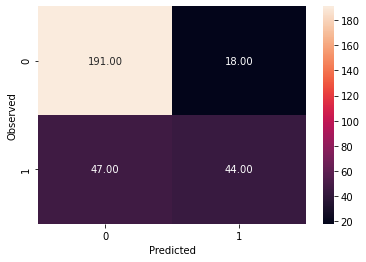

In [78]:
calculate_confusion_matrix(y_test, y_pred)

In [79]:
print(accuracy_score(y_test, y_pred)) # Accuracy went up by 2 pts

0.7833333333333333


In [80]:
trainResult = rf_smote.score(X_train_res, y_train_res)
trainResult

1.0

In [81]:
#Recall
print(f'Recall:{round(recall_score(y_test,y_pred,pos_label=1)*100,2)}%')  # Improvement on Recall Score

Recall:48.35%


### Balanced Random Forest

In [92]:
from imblearn.ensemble import BalancedRandomForestClassifier

bal_rf = BalancedRandomForestClassifier()
bal_rf.fit(X_train,y_train)
bal_rf.fit(X_train,y_train)
pred_bal_rf = bal_rf.predict(X_test)
acc_bal_train_rf = bal_rf.score(X_train, y_train)
acc_bal_rf = accuracy_score(y_test,pred_bal_rf)
recall_bal_rf = recall_score(y_test,pred_bal_rf) 

In [93]:
"Train Accuracy:"
(acc_bal_train_rf*100.0)
# Much better - less overfitting

95.42857142857143

In [94]:
"Test Accuracy:"
(acc_bal_rf*100.0)  # Slight loss in accuracy for higher recall

73.66666666666667

In [95]:
#Recall
print(f'Recall:{round(recall_bal_rf*100,2)}%')   # As discussed, Oversampling reduces FN

Recall:72.53%


In [ ]:
# Confusion Matrix - increase recall - some changes to data. 

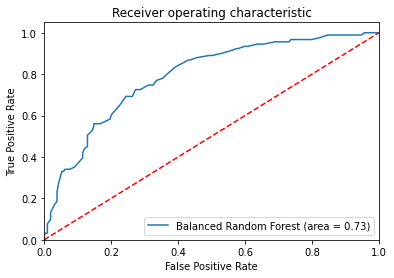

In [88]:
#AUC ROC curve
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score,roc_auc_score,roc_curve
rf_roc_auc = roc_auc_score(y_test, bal_rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, bal_rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Balanced Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

# K-fold cross-validation

k-fold cross validation( without stratification)

Usually k is set as 10-20 in practical settings, depends on data set size

In [ ]:
### Qn - Why would we do Cross Validation ? - To generalize & get better accuracy when model is deployed in Production


In [96]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [97]:
# Running K Fold Cross Validation on the model itself

In [98]:
X_arr = X_train.values
y_arr = y_train.values

In [99]:
scores = []
bal_rf = BalancedRandomForestClassifier()
cv = KFold(n_splits=6, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X_train):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X_arr[train_index], X_arr[test_index], y_arr[train_index], y_arr[test_index]
    bal_rf.fit(X_train, y_train)
    scores.append(recall_score(y_test,bal_rf.predict(X_test))) 
    

Train Index:  [  0   1   3   4   5   7   8   9  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  25  26  27  28  29  32  33  34  35  36  37  38  40  41
  42  43  45  46  47  48  50  51  52  53  56  57  58  59  61  62  64  66
  67  68  71  73  74  75  79  80  82  83  84  85  86  87  88  89  91  92
  93  94  95  96  97  98  99 100 102 103 104 105 106 107 108 110 111 112
 113 114 115 116 117 119 121 122 123 124 125 126 127 128 129 130 134 137
 138 139 140 141 142 143 144 145 146 147 149 150 151 152 153 154 156 157
 159 160 161 162 163 166 167 168 169 170 171 172 173 175 177 178 179 180
 182 183 184 185 186 187 188 189 190 191 193 194 195 196 197 198 200 201
 202 203 205 206 207 208 210 213 214 215 216 217 218 219 220 221 222 224
 225 226 228 229 230 231 232 233 235 236 237 238 239 240 241 242 243 245
 246 247 250 251 252 253 255 257 258 260 261 262 263 264 265 266 267 268
 269 270 272 273 274 275 276 277 278 279 280 281 282 283 285 286 287 288
 291 292 293 294 295 296 297 298 301 

Train Index:  [  0   1   2   4   6   7   9  10  11  12  13  14  15  18  19  20  21  22
  23  24  25  27  28  29  30  31  32  33  34  35  38  39  40  41  42  43
  44  46  47  49  51  52  54  55  56  57  58  60  61  62  63  64  65  66
  68  69  70  71  72  73  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  95  96  97  98  99 100 101 102 104 105 106
 107 108 109 110 112 113 114 116 117 118 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 140 141 142 143 144 145 146
 147 148 149 150 153 154 155 156 158 159 160 161 163 164 165 166 167 169
 170 172 173 174 176 177 178 179 181 182 183 184 185 186 187 188 189 191
 192 195 196 197 198 199 200 201 202 203 204 205 206 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 223 224 227 228 230 231 232 233 234
 235 236 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 254
 256 257 258 259 260 261 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 281 282 284 286 287 

In [100]:
scores = np.array(scores)
scores

array([0.77777778, 0.84090909, 0.75      , 0.6       , 0.76315789,
       0.60714286])

In [102]:
print('Recall Scores')
print(scores)
print('\n')
print('Mean')
print(sum(scores)/len(scores))
print('\n')
print('Standard Deviation')
print(scores.std())


Recall Scores
[0.77777778 0.84090909 0.75       0.6        0.76315789 0.60714286]


Mean
0.7231646034277612


Standard Deviation
0.08925294593855619


In [104]:
num_folds = 6
seed = 42

In [105]:
kfold = KFold(n_splits=num_folds,random_state=seed)

In [106]:
# run Cross validation in 1 line rather than using the for loop above
bal_rf = BalancedRandomForestClassifier()
scores = cross_val_score(bal_rf, X_train,y_train, cv=kfold,scoring='recall')
scores
# scoring can be one of the options - accuracy,precision,recall,f1_score

array([0.71428571, 0.70967742, 0.62162162, 0.88      , 0.69230769,
       0.76470588])

In [107]:
np.mean(abs(scores))

0.7304330549871346

In [108]:
scores.std()

0.07908845477149067

Leave One Out Cross-Validation

In [109]:
# Running on every one data point as test dataset - not used in practice as cost of performing is a lot
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [110]:
# You Will do it on X_train, y_train to save time. It will take too much time, hence not recommended for bigger data
scores = cross_val_score(bal_rf, X_train,y_train, cv=LeaveOneOut(),scoring='recall')
scores

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1.

Because we have 350 samples, the leave one out cross-validation yields scores for 350 trials, and the score indicates either 
defaulter (1.0) or non-defaulter (0.0) prediction. Taking the mean of these gives an estimate of the error rate:

In [111]:
len(scores)

584

In [112]:
X_train.shape

(584, 39)

In [113]:
scores.mean()

0.21404109589041095

In [114]:
scores.std()

0.41015546462340696

# Stratified cross-validation( Bonus)

k-fold cross validation with stratification

In [ ]:
# Distribution on Hold out validation data is similar as training distribution. Specially useful for Class Imbalance Problems

In [115]:
k = 10
from sklearn.model_selection  import StratifiedKFold, cross_val_score
stratified_kfold = StratifiedKFold(n_splits = k, random_state = 42)
results = cross_val_score(bal_rf, X_train,y_train, cv = stratified_kfold,scoring='recall')

In [116]:
print('Accuracy Score')
print('Average: ', results.mean())
print('Standard deviation: ', results.std())

Accuracy Score
Average:  0.6523391812865497
Standard deviation:  0.09432668776378277


In [117]:
# run Cross validation with Grid Search CV
from sklearn.model_selection import GridSearchCV
bal_rf = BalancedRandomForestClassifier()
params = {
    'n_estimators':[125,150,175,200],
    'max_depth':[7,9]
}
grid_classifier = GridSearchCV(bal_rf,params,cv=10,refit=True,return_train_score=True,scoring='recall') # Stratified K Fold
grid_classifier.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=BalancedRandomForestClassifier(),
             param_grid={'max_depth': [7, 9],
                         'n_estimators': [125, 150, 175, 200]},
             return_train_score=True, scoring='recall')

In [118]:
results = grid_classifier.cv_results_

In [119]:
# Get all outputs from results 
results

{'mean_fit_time': array([0.22863066, 0.2768517 , 0.31888998, 0.3724359 , 0.22992349,
        0.27521031, 0.32153678, 0.37135599]),
 'std_fit_time': array([0.00184508, 0.00223132, 0.00854262, 0.01911584, 0.0007135 ,
        0.00067579, 0.00192843, 0.00427682]),
 'mean_score_time': array([0.00893621, 0.01068325, 0.01147952, 0.01334333, 0.00887854,
        0.01039815, 0.01189544, 0.01345987]),
 'std_score_time': array([0.00036055, 0.00038366, 0.00066683, 0.00044255, 0.00030164,
        0.00046452, 0.00030691, 0.00051444]),
 'param_max_depth': masked_array(data=[7, 7, 7, 7, 9, 9, 9, 9],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[125, 150, 175, 200, 125, 150, 175, 200],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 7, 'n_estimators': 125},
  {'max_depth': 7,

In [120]:
# No of models runs
results.get('params')

[{'max_depth': 7, 'n_estimators': 125},
 {'max_depth': 7, 'n_estimators': 150},
 {'max_depth': 7, 'n_estimators': 175},
 {'max_depth': 7, 'n_estimators': 200},
 {'max_depth': 9, 'n_estimators': 125},
 {'max_depth': 9, 'n_estimators': 150},
 {'max_depth': 9, 'n_estimators': 175},
 {'max_depth': 9, 'n_estimators': 200}]

In [123]:
# Precision score for the 8 models on Hold Out data based on Cross Validation with k = 10
results.get('mean_test_score')

array([0.72953216, 0.73567251, 0.72982456, 0.72426901, 0.69649123,
       0.71871345, 0.70204678, 0.71842105])

In [122]:
# Precision score for the 8 models on training data based on Cross Validation with k = 10
results.get('mean_train_score')

array([0.96808301, 0.96256154, 0.9699235 , 0.96439067, 0.99631902,
       0.99877301, 0.99877301, 0.9993865 ])

In [124]:
grid_classifier.best_params_

{'max_depth': 7, 'n_estimators': 150}

In [125]:
grid_classifier.best_score_

0.735672514619883

In [126]:
# Best estimator or the model to choose to run on Test dataset
grid_classifier.best_estimator_

BalancedRandomForestClassifier(max_depth=7, n_estimators=150)

# Bootstrapping ( Bonus)

Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data 
(with/without replacement)

Create a model with each bootstrap sample and validate it with the test set

Final result is calculated by averaging the accuracy of models

In [127]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [128]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    bal_rf.fit(X_, y_)
    y_pred = bal_rf.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [130]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Average: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Average:  0.6870689655172413
Standard deviation:  0.02860458624661561


Inference:

Here crossfold validation with stratification gives better result than Bootstrapping.